In [1]:
import pandas as pd
import numpy as np
import altair as alt

# Data Processing

## 2011 Data

In [2]:
df11 = pd.read_csv('data/2011f.csv')
df11.drop(df11.columns[[4, 11, 12]], axis=1, inplace=True)
df11.replace(['N/A', 'NA', 'na', 'n/a'], np.nan, inplace=True)


In [3]:
df11.replace(['Puratchi bharatham', 'pb'], 'PB', inplace=True)
df11.replace('Indhiya kudiyarasu katchi', 'INKK', inplace=True)
df11.replace('Society unity centre of India(communist)', 'SUCI', inplace=True)
df11.replace('Manidha neya makkal katchi', 'MAMAK', inplace=True)
df11.replace('TAMIL MANILA SIVA SENA', 'TMSS', inplace=True)
df11.replace('Ambetkar makkal iyakkam', 'APM', inplace=True)
df11.replace('RPI(a)', 'RPI', inplace=True)
df11.replace('RPI(A)', 'RPI', inplace=True)


In [4]:
temp = df11['Education'][::]

#School
school = [i for i in temp if 'std' in i]
school = set(school)
school = list(school)
school.extend(['SSLC', 'PUC'])
temp.replace(school, 'School', inplace=True)

#PHD
phd = [i for i in temp if ('phd' in i.lower() or 'ph.d' in i.lower())]
temp.replace(phd, 'PHD', inplace=True)
# temp.value_counts()

#PG
pg = [i for i in temp if 'mba' in i.lower() or 'iim' in i.lower()]
temp.replace(pg, 'PG', inplace=True)

#UG
ug = [i for i in temp if i[0] == 'B']
ug = set(ug)
ug = list(ug)
ug.extend(['MBBS', 'LLB', 'FCS, AICWA', 'CPLC'])
temp.replace(ug, 'UG', inplace=True)
# temp.value_counts()

#PG
pg = [i for i in temp if i[0] == 'M']
pg = set(pg)
pg = list(pg)
temp.replace(pg, 'PG', inplace=True)
# temp.value_counts()

#Diploma
dip = [i for i in temp if i.lower()[0] == 'd']
dip = set(dip)
dip = list(dip)
dip.extend(['Polytechnic', 'ITI'])
temp.replace(dip, 'Diploma', inplace=True)
# temp.value_counts()

temp.replace('No', 'None', inplace=True)
#temp.value_counts()

df11['Literate Status'] = temp
#df11['Literate Status'].value_counts()

df11['Case status'].replace('No', 0, inplace=True)
df11['Case status'].mask(df11['Case status'] != 0, 1, inplace=True)
# df11['Case status'].value_counts()

df11.rename(columns={'D.O.B/Age': 'Age', 'Consituency': 'Constituency', 'Case status': 'Case_Status',
                     'Asset Declared': 'Total_Assets', 'Party Id': 'Party', 'Literate Status': 'Edu_Level'}, inplace=True)
df11.drop(['Education', 'Movable Assets',
           'Immovable Assets'], axis=1, inplace=True)

cols = df11.columns.tolist()
cols = cols[:3]+cols[-1:]+cols[3:8]
df11 = df11[cols]


In [5]:
df11['Age'].fillna((df11['Age'].mean()), inplace=True)
df11['Age'] = df11['Age'].astype('int')

df11['Case_Status'] = df11['Case_Status'].astype('int')
for i in ['Name', 'Gender', 'Edu_Level', 'Constituency', 'Party']:
  df11[i].str.encode('utf-8')


In [6]:
df11.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Name          244 non-null    object 
 1   Gender        244 non-null    object 
 2   Age           244 non-null    int64  
 3   Edu_Level     244 non-null    object 
 4   Constituency  244 non-null    object 
 5   Case_Status   244 non-null    int64  
 6   Total_Assets  244 non-null    float64
 7   Party         244 non-null    object 
 8   Winner        244 non-null    int64  
dtypes: float64(1), int64(3), object(5)
memory usage: 17.3+ KB


## 2016 Data

In [7]:
df16 = pd.read_csv(
    'data/2016f.csv', encoding='mac_roman')
df16.drop(df16.columns[[4, 11, 12, 13, 14]], axis=1, inplace=True)

#MK Mohan age
df16.replace('N /A', 61, inplace=True)

df16.replace(['N/A', 'NA'], np.nan, inplace=True)

df16.replace('ntk', 'NTK', inplace=True)
df16.replace('RPI(A)', 'RPI', inplace=True)
df16.replace('LP (S)', 'LP(S)', inplace=True)

# df16['Party Id'].value_counts()

df16['Case status'].replace(np.nan, 0, inplace=True)
df16['Case status'].mask(df16['Case status'] != 0, 1, inplace=True)
# df16['Case status'].value_counts()

temp = df16['Education'][::]
temp = temp.astype('str')
temp = temp.str.strip()

#School
school = [i for i in temp if 'std' in i.lower() or 'th' in i.lower()]
school = set(school)
school = list(school)
sc = ['SSLC', 'PUC', 'S.S.L.C', 'SSC', 'High school']
sc2 = [j for i in sc for j in temp if i in j]
sc2 = set(sc2)
sc2 = list(sc2)
sc2
school.extend(sc2)
temp.replace(school, 'School', inplace=True)

# temp.replace('SSLC', 'School', inplace=True)

# df16.head()
#PHD
phd = [i for i in temp if ('phd' in i.lower() or 'ph.d' in i.lower())]
temp.replace(phd, 'PHD', inplace=True)
phd

#PG
pg = [i for i in temp if 'mba' in i.lower() or 'iim' in i.lower()]
temp.replace(pg, 'PG', inplace=True)

#UG
ug = [i for i in temp if i[0] == 'B']
ug = set(ug)
ug = list(ug)
ug.extend(['MBBS', 'LLB', 'FCS, AICWA', 'CPLC', 'L.L.B.', 'U.G.,',
           'L.L.B.,', 'Gramiya kalaimani degree', 'AMIE (Textile)', 'CPL (PILOT)'])
temp.replace(ug, 'UG', inplace=True)
pg = [i for i in temp if i[0] == 'M']
pg = set(pg)
pg = list(pg)
temp.replace(pg, 'PG', inplace=True)

#Diploma
dip = [i for i in temp if i.lower()[0] == 'd']
dip = set(dip)
dip = list(dip)
dip.extend(['Polytechnic', 'ITI'])
temp.replace(dip, 'Diploma', inplace=True)
temp.replace(['No', 'NaN', 'nan', 'NIL'], 'None', inplace=True)
# temp.value_counts()

df16['Literate Status'] = temp
# df16['Literate Status'].value_counts()

df16.rename(columns={'ÔªøName': 'Name', 'D.O.B/Age': 'Age', 'Consituency': 'Constituency', 'Case status': 'Case_Status',
                     'Asset Declared': 'Total_Assets', 'Party Id': 'Party', 'Literate Status': 'Edu_Level'}, inplace=True)
df16.drop(['Education', 'Movable Assets',
           'Immovable Assets'], axis=1, inplace=True)

cols = df16.columns.tolist()
cols = cols[:3]+cols[-1:]+cols[3:8]
df16 = df16[cols]

df16['Total_Assets'].fillna(0, inplace=True)
df16.replace('47 years ', 47, inplace=True)

df16['Age'] = pd.to_numeric(df16['Age'])
df16['Age'].fillna((df16['Age'].mean()), inplace=True)
df16['Age'] = df16['Age'].astype('int')
# df16['Total_Assets']=df16['Total_Assets'].astype('float')
df16['Total_Assets'] = pd.to_numeric(df16['Total_Assets'])
for i in ['Name', 'Gender', 'Edu_Level', 'Constituency', 'Party']:
  df16[i].str.encode('utf-8')



In [8]:
df16.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 352 entries, 0 to 351
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Name          352 non-null    object 
 1   Gender        352 non-null    object 
 2   Age           352 non-null    int64  
 3   Edu_Level     352 non-null    object 
 4   Constituency  352 non-null    object 
 5   Case_Status   352 non-null    object 
 6   Total_Assets  352 non-null    float64
 7   Party         352 non-null    object 
 8   Winner        352 non-null    int64  
dtypes: float64(1), int64(2), object(6)
memory usage: 24.9+ KB


## 2021 Data

In [9]:
df21 = pd.read_csv(
    'data/2021f.csv', encoding='mac_roman')
df21.drop(df21.columns[[1, 4, 5, 9, 13, 14, 15, 16, 17]], axis=1, inplace=True)

df21.replace(['N/A', 'NA', 'na', 'n/a'], np.nan, inplace=True)
# df21.info()

df21['Constituency'].unique()

# df21['criminalstatus']
df21['criminalstatus'].replace('No', 0, inplace=True)
df21['criminalstatus'].mask(df21['criminalstatus'] != 0, 1, inplace=True)
# df21['criminalstatus'].value_counts()

df21.replace(['Schooling', 'Graduation', 'Post graduation', 'Illiterate'], [
             'School', 'UG', 'PG', 'None'], inplace=True)
# df21['Literate Status'].value_counts()

one = df21['Party Id'][:]
one = [''.join([c for c in s if c.isupper()]) for s in one]
one = pd.Series(one)
one.replace('I', 'IND', inplace=True)
df21['Party Id'] = one
# df21['Party Id'].value_counts()

df21.rename(columns={'age': 'Age', 'criminalstatus': 'Case_Status', 'Total Asset Declared': 'Total_Assets',
                     'Party Id': 'Party', 'Literate Status': 'Edu_Level'}, inplace=True)
df21.drop(['Education', 'Movable Asset', 'Immovable Asset'],
          axis=1, inplace=True)

cols = ['Name',
        'Gender',
        'Age',
        'Edu_Level',
        'Constituency',
        'Case_Status',
        'Total_Assets',
        'Party']
df21 = df21[cols]


df21['Age'] = df21['Age'].astype('int')
df21['Total_Assets'] = df21['Total_Assets'].astype('float')
for i in ['Name', 'Gender', 'Edu_Level', 'Constituency', 'Party']:
  df21[i].str.encode('utf-8')
  # df21[i]=df21[i].astype('str')



In [10]:
df21.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 172 entries, 0 to 171
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Name          172 non-null    object 
 1   Gender        172 non-null    object 
 2   Age           172 non-null    int64  
 3   Edu_Level     172 non-null    object 
 4   Constituency  172 non-null    object 
 5   Case_Status   172 non-null    int64  
 6   Total_Assets  172 non-null    float64
 7   Party         172 non-null    object 
dtypes: float64(1), int64(2), object(5)
memory usage: 10.9+ KB


## Further Pre Processing

In [11]:
df11['Year'] = 0
df16['Year'] = 1
df21['Year'] = 2


In [12]:
for i, j, k in zip(sorted(df11.Constituency.unique()), sorted(df16.Constituency.unique()), sorted(df21.Constituency.unique())):
  df11.Constituency.replace(i, k, inplace=True)
  df16.Constituency.replace(j, k, inplace=True)


In [13]:
from sklearn.preprocessing import OrdinalEncoder

oe = OrdinalEncoder()

oe.fit(df21[['Constituency']])

df11.Constituency = oe.transform(df11[['Constituency']])
df16.Constituency = oe.transform(df16[['Constituency']])
df21.Constituency = oe.transform(df21[['Constituency']])

df11.Constituency = df11.Constituency.astype('int')
df16.Constituency = df16.Constituency.astype('int')
df21.Constituency = df21.Constituency.astype('int')


In [14]:
df16.Gender.unique()

df16.replace('Male ', 'Male', inplace=True)
df16.replace('male ', 'Male', inplace=True)
df16.replace('male', 'Male', inplace=True)
df16.replace('Female ', 'Female', inplace=True)
df16.replace('Female  ', 'Female', inplace=True)
df16.replace('Third gender ', 'Other', inplace=True)
df21.replace('MAle', 'Male', inplace=True)

df11.Gender = df11.Gender.map({'Female': 0, 'Male': 1, 'Other': 2})
df16.Gender = df16.Gender.map({'Female': 0, 'Male': 1, 'Other': 2})
df21.Gender = df21.Gender.map({'Female': 0, 'Male': 1, 'Other': 2})


In [15]:
df11.Edu_Level = df11.Edu_Level.map(
    {'None': 0, 'School': 1, 'Diploma': 2, 'UG': 3, 'PG': 4, 'PHD': 5})
df16.Edu_Level = df16.Edu_Level.map(
    {'None': 0, 'School': 1, 'Diploma': 2, 'UG': 3, 'PG': 4, 'PHD': 5})
df21.Edu_Level = df21.Edu_Level.map(
    {'None': 0, 'School': 1, 'Diploma': 2, 'UG': 3, 'PG': 4, 'PHD': 5})


In [16]:
parties = ['AIADMK', 'DMK', 'PMK', 'BJP', 'INC', 'MNM', 'AMMK', 'DMDK']
df11.Party = df11.Party.apply(
    lambda x: parties.index(x) if x in parties else 8)
df16.Party = df16.Party.apply(
    lambda x: parties.index(x) if x in parties else 8)
df21.Party = df21.Party.apply(
    lambda x: parties.index(x) if x in parties else 8)


In [17]:
df11.Total_Assets.replace(0, 1, inplace=True)
df16.Total_Assets.replace(0, 1, inplace=True)
df21.Total_Assets.replace(0, 1, inplace=True)

df11.Total_Assets = np.log10(df11.Total_Assets).astype(int)
df16.Total_Assets = np.log10(df16.Total_Assets).astype(int)
df21.Total_Assets = np.log10(df21.Total_Assets).astype(int)


----
----

# Models

In [18]:
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.calibration import CalibratedClassifierCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB


## Combining 2011 and 2016 Data

In [19]:
frames = [df11, df16]
df = pd.concat(frames)
df.shape


(596, 10)

In [20]:
X_train = df.drop(columns=['Name', 'Winner'])
y_train = df['Winner']
X_test = df21.drop(columns=['Name'])


### K-Fold Cross Validation

In [21]:
#K-Fold Cross Validation

models = [
    LogisticRegression(max_iter=1000),
    SVC(),
    KNeighborsClassifier(n_neighbors=3),
    RandomForestClassifier(n_estimators=200, max_depth=3, random_state=0),
    # GaussianNB()
]

CV = 5
cv_df = pd.DataFrame(index=range(CV * len(models)))
entries = []
for model in models:
    model_name = model.__class__.__name__
    accuracies = cross_val_score(
        model, X_train, y_train, scoring='accuracy', cv=CV)
    for fold_idx, accuracy in enumerate(accuracies):
        entries.append((model_name, fold_idx, accuracy))
    print("Done: " + model_name)

cv_df = pd.DataFrame(entries, columns=['model_name', 'fold_idx', 'accuracy'])


Done: LogisticRegression
Done: SVC
Done: KNeighborsClassifier
Done: RandomForestClassifier


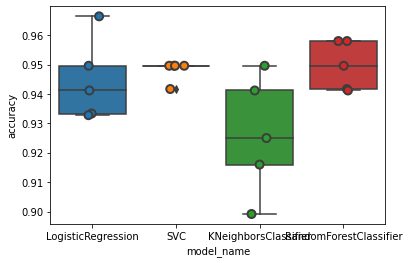

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x='model_name', y='accuracy', data=cv_df)
sns.stripplot(x='model_name', y='accuracy', data=cv_df,
              size=8, jitter=True, edgecolor="gray", linewidth=2)
plt.show()


In [23]:
cv_df.groupby('model_name').accuracy.mean()

model_name
KNeighborsClassifier      0.926176
LogisticRegression        0.944650
RandomForestClassifier    0.949678
SVC                       0.947997
Name: accuracy, dtype: float64

## Predicting 2021 Results using 2011 and 2016 Data
### 1. Logistic Regression

In [24]:
model = LogisticRegression(max_iter=1000)
clf = CalibratedClassifierCV(model)
clf.fit(X_train, y_train)
y_proba = clf.predict_proba(X_test)


In [25]:
y_proba[:5]


array([[0.97917009, 0.02082991],
       [0.87400343, 0.12599657],
       [0.95989296, 0.04010704],
       [0.98194149, 0.01805851],
       [0.99148791, 0.00851209]])

In [26]:
df_pr1 = df21.copy(deep=True)
df_pr1['Prob'] = y_proba[:, 1]
df_pr1.head()


,Name,Gender,Age,Edu_Level,Constituency,Case_Status,Total_Assets,Party,Year,Prob
0,V. Ravikumar,1,49,4,0,0,7,8,2,0.020830
1,S. Gokula Indira,1,55,4,0,0,7,0,2,0.125997
2,K.N. Gunasekaran,1,61,1,0,0,7,6,2,0.040107
3,Ansar Ahmed,1,54,1,0,0,5,8,2,0.018059
4,M. Veriyandi,1,36,0,0,0,0,8,2,0.008512


In [27]:
df_pr1['Winner'] = 0


In [28]:
max_pr1 = df_pr1.groupby(['Constituency'], sort=False)['Prob'].max()
max_pr1


Constituency
0     0.386052
1     0.193393
2     0.094216
3     0.376381
4     0.098887
5     0.313223
6     0.198190
7     0.217246
8     0.127352
9     0.255365
10    0.086762
11    0.295726
12    0.080404
13    0.083887
14    0.169381
15    0.108268
Name: Prob, dtype: float64

In [29]:
i2 = []
for c, p in enumerate(max_pr1):
  i1 = df_pr1[df_pr1['Constituency'] == c].index.tolist()
  for idx in i1:
    if(df_pr1.loc[idx].Prob == p):
      # print('Hello ', idx)
      i2.append(idx)

for i in i2:
  df_pr1['Winner'][i] = 1


<ipython-input-29-0a0d758633e9>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pr1['Winner'][i] = 1


#### Winners Predicted

In [30]:
from tabulate import tabulate

df_pr1['Name2'] = df21['Name']
cons = ['Anna Nagar', 'Chepauk-Thiruvallikeni ', 'Dr.Radhakrishnan Nagar',
        'Egmore', 'Harbour', 'Kolathur', 'Mylapore', 'Perambur',
        'Royapuram', 'Saidapet', 'Thiru-Vi-Ka-Nagar', 'Thiyagarayanagar',
        'Thousand Lights', 'Velachery', 'Villivakkam', 'Virugampakkam']
table = []
for idx, i in enumerate(i2):
  table.append([df_pr1['Name2'][i], cons[idx]])

print(tabulate(table, headers=['Predicted Winner', 'Constituency']))


Predicted Winner                Constituency
------------------------------  ----------------------
M.K. Mohan                      Anna Nagar
S.Udhayanidhi                   Chepauk-Thiruvallikeni
R.S.Rajesh                      Dr.Radhakrishnan Nagar
B.John Pandian                  Egmore
P.K.Sekar Babu                  Harbour
M.K.Stalin                      Kolathur
R.Nataraj                       Mylapore
R.D.Sekar                       Perambur
D.Jayakumar                     Royapuram
M.A.Subramanian                 Saidapet
P.Sivakumar Alias Thayagamkavi  Thiru-Vi-Ka-Nagar
B.Sathiyanaarayanan             Thiyagarayanagar
K.M.Shariff                     Thousand Lights
M.K.Ashok                       Velachery
J.C.D.Prabhakar                 Villivakkam
V.N. Ravi                       Virugampakkam


### 2. KNN

In [31]:
model = KNeighborsClassifier(n_neighbors=3)
clf = CalibratedClassifierCV(model)
clf.fit(X_train, y_train)
y_proba = clf.predict_proba(X_test)


In [32]:
y_proba[:5]


array([[0.92108134, 0.07891866],
       [0.86602127, 0.13397873],
       [0.95607226, 0.04392774],
       [0.95607226, 0.04392774],
       [0.95607226, 0.04392774]])

In [33]:
df_pr2 = df21.copy(deep=True)
df_pr2['Prob'] = y_proba[:, 1]
df_pr2.head()


,Name,Gender,Age,Edu_Level,Constituency,Case_Status,Total_Assets,Party,Year,Prob
0,V. Ravikumar,1,49,4,0,0,7,8,2,0.078919
1,S. Gokula Indira,1,55,4,0,0,7,0,2,0.133979
2,K.N. Gunasekaran,1,61,1,0,0,7,6,2,0.043928
3,Ansar Ahmed,1,54,1,0,0,5,8,2,0.043928
4,M. Veriyandi,1,36,0,0,0,0,8,2,0.043928


In [34]:
df_pr2['Winner'] = 0
max_pr2 = df_pr2.groupby(['Constituency'], sort=False)['Prob'].max()
max_pr2


Constituency
0     0.133979
1     0.106241
2     0.065211
3     0.102640
4     0.072639
5     0.114103
6     0.065211
7     0.193635
8     0.141232
9     0.075986
10    0.198870
11    0.136747
12    0.070967
13    0.070967
14    0.073939
15    0.078424
Name: Prob, dtype: float64

In [35]:
i2 = []
for c, p in enumerate(max_pr2):
  i1 = df_pr2[df_pr2['Constituency'] == c].index.tolist()
  done=False
  for idx in i1:
    if(df_pr2.loc[idx].Prob == p and not done):
      # print('Hello ', idx)
      i2.append(idx)
      done=True

for i in i2:
  df_pr2['Winner'][i] = 1

<ipython-input-35-273c7839be07>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pr2['Winner'][i] = 1


In [36]:
df_pr2['Name2'] = df21['Name']
table2 = []
for idx, i in enumerate(i2):
  table2.append([df_pr2['Name2'][i], cons[idx]])

print(tabulate(table2, headers=['Predicted Winner', 'Constituency']))


Predicted Winner                Constituency
------------------------------  ----------------------
S. Gokula Indira                Anna Nagar
S.Udhayanidhi                   Chepauk-Thiruvallikeni
R.S.Rajesh                      Dr.Radhakrishnan Nagar
B.John Pandian                  Egmore
P.K.Sekar Babu                  Harbour
Aadi Rajaram                    Kolathur
R.Nataraj                       Mylapore
R.D.Sekar                       Perambur
R.Murthy                        Royapuram
M.A.Subramanian                 Saidapet
P.Sivakumar Alias Thayagamkavi  Thiru-Vi-Ka-Nagar
J.Karunanithi                   Thiyagarayanagar
N.Vaidhyanathan                 Thousand Lights
V.L.Revathi Jayakumari          Velachery
J.C.D.Prabhakar                 Villivakkam
V.N. Ravi                       Virugampakkam


### 3. Naive Bayes

In [37]:
df11.sort_values(by=['Constituency'])
df16.sort_values(by=['Constituency'])
df21.sort_values(by=['Constituency'])


,Name,Gender,Age,Edu_Level,Constituency,Case_Status,Total_Assets,Party,Year
0,V. Ravikumar,1,49,4,0,0,7,8,2
13,S. Yuvaraja,1,48,1,0,0,5,8,2
12,S.D. Prabhakar,1,41,3,0,0,0,8,2
11,V. Paulraj Guna,1,48,1,0,0,5,8,2
10,J. Nagaraj,1,42,2,0,0,6,8,2
...,...,...,...,...,...,...,...,...,...
166,A.M.V.Prabhakara Raja,1,32,4,15,0,7,1,2
167,S. Snekan,1,48,1,15,0,7,5,2
168,T.S.Rajendran,1,57,1,15,0,6,8,2
169,G.Ravi,1,36,1,15,0,0,8,2


In [38]:
from sklearn.naive_bayes import CategoricalNB

In [39]:
df11['Year'] = 0
df16['Year'] = 1
df21['Year'] = 2

model = CategoricalNB(min_categories=[3, 7, 6, 16, 2, 10, 9, 3])

x11 = df11.drop(columns=['Name', 'Winner'])
y11 = df11['Winner']

x11.head()

model.partial_fit(x11, y11, classes=[0, 1])

x16 = df16.drop(columns=['Name', 'Winner'])
y16 = df16['Winner']

model.partial_fit(x16, y16)

x21 = df21.drop(columns=['Name'])
# y21 = df21['Winner']

pred = model.predict(x21)

a, b = np.asarray([]), np.asarray([])
for i in range(16):
  test_x = df21.loc[df21['Constituency'] == i][['Gender', 'Age', 'Edu_Level',
                                                'Constituency', 'Case_Status', 'Total_Assets', 'Party', 'Year']]
  # test_y = df21.loc[df21['Constituency']==i]['Winner']
  # a = np.append(a, test_y)
  test_pred = model.predict_proba(test_x)
  # print(max(test_pred[:,1]))
  # print(sum(test_pred[:,1]==max(test_pred[:,1])))
  b = np.append(b, test_pred[:, 1] == max(test_pred[:, 1]))


In [40]:
tdf21 = df21.copy(deep=True)
tdf21['PrWinner'] = b
tdf21['Party'] = tdf21.Party.apply(lambda x: parties[x] if x < 8 else 'OTH')
tdf21['Constituency'] = oe.inverse_transform(
    np.asarray(tdf21['Constituency']).reshape(-1, 1))


In [41]:
tmp3 = tdf21[tdf21['PrWinner'] == 1][['Name', 'Constituency']]
table3 = tmp3.values.tolist()


In [42]:
print(tabulate(table3, headers=['Predicted Winner', 'Constituency']))


Predicted Winner                Constituency
------------------------------  ----------------------
M.K. Mohan                      Anna Nagar
S.Udhayanidhi                   Chepauk-Thiruvallikeni
P.Kalidas                       Dr.Radhakrishnan Nagar
B.John Pandian                  Egmore
P.Santhana Krishnan             Harbour
M.K.Stalin                      Kolathur
R.Nataraj                       Mylapore
R.D.Sekar                       Perambur
C.Ramajayam                     Royapuram
M.A.Subramanian                 Saidapet
P.Sivakumar Alias Thayagamkavi  Thiru-Vi-Ka-Nagar
B.Sathiyanaarayanan             Thiyagarayanagar
K.M.Shariff                     Thousand Lights
Santhosh Babu                   Velachery
J.C.D.Prabhakar                 Villivakkam
B.Parthasarathy                 Virugampakkam


# Comparison of Results

In [43]:
winnersList = ['M.K. Mohan','S.Udhayanidhi','J.John Ebenezer','I. Paranthamen','P.K.Sekar Babu','M.K.Stalin',
				'T.Velu','R.D.Sekar','R.Murthy','M.A.Subramanian','P.Sivakumar Alias Thayagamkavi','J.Karunanithi',
				'N.Ezhilan','Jmh.Aassan Maulaana','A.Vetriazhagan','A.M.V.Prabhakara Raja']

len(winnersList)

16

In [44]:
comp = []
for i, c in enumerate(cons):
  comp.append([c, winnersList[i], table[i][0], table2[i][0], table3[i][0]])

print('2021 TN Elections - Chennai')
print(tabulate(comp, headers=['Constituency', 'Winner',
                              'LR Prediction', 'KNN Prediction', 'Naive Bayes Prediction']))


2021 TN Elections - Chennai
Constituency            Winner                          LR Prediction                   KNN Prediction                  Naive Bayes Prediction
----------------------  ------------------------------  ------------------------------  ------------------------------  ------------------------------
Anna Nagar              M.K. Mohan                      M.K. Mohan                      S. Gokula Indira                M.K. Mohan
Chepauk-Thiruvallikeni  S.Udhayanidhi                   S.Udhayanidhi                   S.Udhayanidhi                   S.Udhayanidhi
Dr.Radhakrishnan Nagar  J.John Ebenezer                 R.S.Rajesh                      R.S.Rajesh                      P.Kalidas
Egmore                  I. Paranthamen                  B.John Pandian                  B.John Pandian                  B.John Pandian
Harbour                 P.K.Sekar Babu                  P.K.Sekar Babu                  P.K.Sekar Babu                  P.Santhana Krishnan
Kolathur

In [45]:
models = ['Logistic Regression','K Nearest Neighbours','Naive Bayes']
model_correct_ct =[0,0,0]
model_accuracy = [0,0,0]

for i in range(16):
	if winnersList[i]==table[i][0]:
		model_correct_ct[0] += 1
	if winnersList[i]==table2[i][0]:
		model_correct_ct[1] += 1
	if winnersList[i]==table3[i][0]:
		model_correct_ct[2] += 1



resultsTable = []

for i in range(3):
	model_accuracy[i] = 100 * model_correct_ct[i] / 16.0
	resultsTable.append([models[i],model_correct_ct[i],model_accuracy[i]])

print('2021 TN Elections - Chennai')
print(tabulate(resultsTable, headers=['Model/Method', '# Correct Predictions ','% Accuracy']))


2021 TN Elections - Chennai
Model/Method            # Correct Predictions     % Accuracy
--------------------  ------------------------  ------------
Logistic Regression                          7         43.75
K Nearest Neighbours                         7         43.75
Naive Bayes                                  6         37.5
